In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus as pdp
import graphviz 
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine

In [3]:
data = load_wine()

In [4]:
X=pd.DataFrame(data.data,columns=data.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


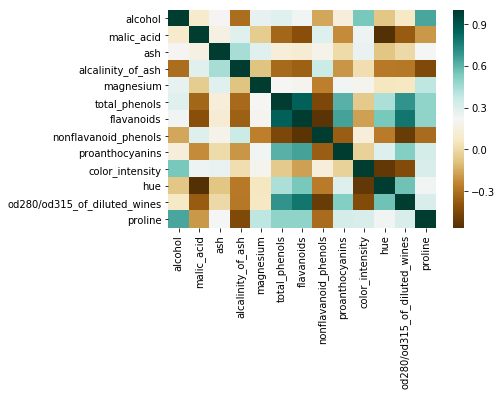

In [6]:
sns.heatmap(X.corr(),cmap="BrBG",annot=False)

In [7]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
y=pd.DataFrame(data.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
clf=DecisionTreeClassifier()
params = {
    'max_depth': list(range(1, 20)),
    'min_samples_leaf' : list(range(5,20)),
    'criterion': ['gini', 'entropy'],
}

In [12]:
grid_search = GridSearchCV(clf, param_grid=params, cv=5)

In [13]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8709677419354839
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 7}


In [15]:
clf = DecisionTreeClassifier(max_depth=2,min_samples_leaf=7,criterion='entropy')

In [16]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf.score(X_train, Y_train)))

Accuracy of Decision Tree classifier on original training set: 0.98


In [18]:
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on original test set: 0.94
